In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil
import random
from keras.applications import VGG19,VGG16fv
from keras.models import Sequential, Model
from keras.layers import Flatten, InputLayer,Dense
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay
import keras_tuner as kt
from keras_tuner import RandomSearch
import pickle

In [3]:
os.mkdir(r"C:\Users\LENOVO\Downloads\dataset\train")
os.mkdir(r"C:\Users\LENOVO\Downloads\dataset\test")
os.mkdir(r"C:\Users\LENOVO\Downloads\dataset\validation")

In [4]:


for breeds in os.listdir(r"C:\Users\LENOVO\Downloads\archive\dataset"):
    os.mkdir(r"C:\Users\LENOVO\Downloads\dataset\train\{}".format(breeds))
    os.mkdir(r"C:\Users\LENOVO\Downloads\dataset\test\{}".format(breeds))
    os.mkdir(r"C:\Users\LENOVO\Downloads\dataset\validation\{}".format(breeds))
    images=(os.listdir(r"C:\Users\LENOVO\Downloads\archive\dataset\{}".format(breeds)))
    random.shuffle(images)
    train_end=int(len(images)*0.8)
    train_images=images[:train_end]
    test_end=train_end+int(len(images)*0.15)
    test_images=images[train_end:test_end]
    val_images=images[test_end:]
    for j in train_images:
        src=os.path.join(r"C:\Users\LENOVO\Downloads\archive\dataset",breeds,j)
        dst=os.path.join(r"C:\Users\LENOVO\Downloads\dataset\train",breeds,j)
        shutil.copy(src,dst)
        
    for i in test_images:
        src=os.path.join(r"C:\Users\LENOVO\Downloads\archive\dataset",breeds,i)
        dst=os.path.join(r"C:\Users\LENOVO\Downloads\dataset\test",breeds,i)
        shutil.copy(src,dst)
        
    for k in val_images:
        src=os.path.join(r"C:\Users\LENOVO\Downloads\archive\dataset",breeds,k)
        dst=os.path.join(r"C:\Users\LENOVO\Downloads\dataset\validation",breeds,k)
        shutil.copy(src,dst)
        
    
    



                                                                                                                                                       
    

In [2]:
## exclude ANN

vgg16_a=VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [3]:
model_input=vgg16_a.input
flatten=Flatten()(vgg16_a.output)

In [4]:
model=Model(inputs=model_input,outputs=flatten)

In [5]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
for layers in model.layers:
    if('conv' in layers.name):
        layers.trainable=False
    
    else:
        pass
    

    

In [7]:
for layers in model.layers:
    print(layers.name,layers.trainable)

input_layer True
block1_conv1 False
block1_conv2 False
block1_pool True
block2_conv1 False
block2_conv2 False
block2_pool True
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool True
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool True
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool True
flatten True


In [77]:
pickle.dump(model,open(r"C:\Users\LENOVO\Desktop\dogbreed\featuresmodel.pkl",'wb'))

In [8]:
list_x=[]
list_y=[]

for file in os.listdir(r"C:\Users\LENOVO\Downloads\dataset\train"):
    for image in os.listdir(r"C:\Users\LENOVO\Downloads\dataset\train\{}".format(file)):
        image=cv2.imread(r"C:\Users\LENOVO\Downloads\dataset\train\{}\{}".format(file,image),1)
        image=cv2.resize(image,(224,224))
        
        image=image[np.newaxis]
        features=model.predict(image)
        list_x.append(features.reshape(-1))
        list_y.append(file)
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
df=pd.DataFrame(list_x)

In [10]:
df['Target']=list_y

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,Target
0,0.0,0.0,0.0,0.000000,0.274903,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,Beagle
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,12.244360,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,Beagle
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.234419,0.0,9.582932,0.000000,0.0,0.0,4.881648,0.00000,Beagle
3,0.0,0.0,0.0,0.000000,13.274027,0.0,0.0,0.000000,0.0,0.0,...,0.0,8.156318,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,Beagle
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,Beagle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0.0,0.0,0.0,54.577339,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,Yorkshire_Terrier
767,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,Yorkshire_Terrier
768,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,4.452812,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,Yorkshire_Terrier
769,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,3.593505,0.000000,0.0,0.0,0.860171,4.57478,Yorkshire_Terrier


In [12]:
fv_train=df.iloc[:,:-1]
cv_train=df.iloc[:,-1]

In [13]:
le=LabelEncoder()
cv_train=le.fit_transform(cv_train)

In [76]:
pickle.dump(le,open(r"C:\Users\LENOVO\Desktop\dogbreed\le.pkl",'wb'))

### Using Machine Learning Models

In [14]:
models={'lor':LogisticRegression(),'svm':SVC()}
parameters={'lor': {'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    'svm': {'kernel': ['poly', 'rbf'], 'C': uniform(loc=1,scale=2)}}

In [15]:
random_search={}

for key in models.keys():
    if(key in parameters):
        random_search[key]=RandomizedSearchCV(models[key],parameters[key],scoring='accuracy',cv=3)
        random_search[key].fit(fv_train,cv_train)
    

C:\Users\LENOVO\Jupyter\mynewv\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [16]:
random_search['lor'].best_params_

{'solver': 'liblinear', 'penalty': 'l2'}

In [17]:
random_search['lor'].best_score_

0.993514915693904

In [18]:
random_search['svm'].best_params_

{'C': 1.1385625219679627, 'kernel': 'rbf'}

In [19]:
random_search['svm'].best_score_

0.9961089494163424

In [20]:
list_x=[]
list_y=[]

for file in os.listdir(r"C:\Users\LENOVO\Downloads\dataset\test"):
    for image in os.listdir(r"C:\Users\LENOVO\Downloads\dataset\test\{}".format(file)):
        image=cv2.imread(r"C:\Users\LENOVO\Downloads\dataset\test\{}\{}".format(file,image),1)
        image=cv2.resize(image,(224,224))
        
        image=image[np.newaxis]
        features=model.predict(image)
        list_x.append(features.reshape(-1))
        list_y.append(file)
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [21]:
df1=pd.DataFrame(list_x)
df1['label']=list_y

In [22]:
df1

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,label
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Beagle
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.008061,0.000000,0.0,0.0,0.0,0.0,Beagle
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,18.924925,0.0,8.132470,0.000000,0.0,0.0,0.0,0.0,Beagle
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Beagle
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,65.370338,21.561577,0.0,0.0,0.0,0.0,Beagle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.0,0.0,0.0,54.577339,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Yorkshire_Terrier
139,0.0,0.0,0.0,0.000000,17.068512,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,11.415668,0.0,0.0,0.0,0.0,Yorkshire_Terrier
140,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Yorkshire_Terrier
141,0.0,0.0,0.0,0.000000,19.887575,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Yorkshire_Terrier


In [23]:
fv_test=df1.iloc[:,:-1]
cv_test=df1.iloc[:,-1]

In [24]:
cv_test=le.transform(cv_test)

In [29]:
svm1=SVC(C=1.1385625219679627, kernel= 'rbf')
final_model=svm1.fit(fv_train,cv_train)
y_pred=final_model.predict(fv_test)

In [30]:
accuracy_score(cv_test,y_pred)

0.9790209790209791

In [31]:
print(classification_report(cv_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      0.87      0.93        15
           3       1.00      1.00      1.00        14
           4       1.00      0.93      0.96        14
           5       1.00      1.00      1.00        13
           6       0.93      1.00      0.97        14
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        13
           9       0.88      1.00      0.94        15

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



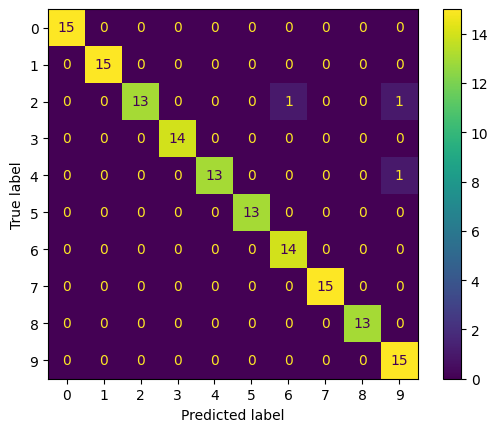

In [32]:
cm=confusion_matrix(cv_test,y_pred)
x=ConfusionMatrixDisplay(cm)
x.plot()
plt.show()

In [33]:
image=cv2.imread(r"C:\Users\LENOVO\Downloads\bulldog.jpeg")

In [34]:
image=cv2.resize(image,(224,224))
image=image[np.newaxis]
features=model.predict(image)
features.reshape(-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [35]:
features.shape

(1, 25088)

In [36]:
final_model.predict(features)

array([2])

In [37]:
le.inverse_transform(final_model.predict(features))

array(['Bulldog'], dtype=object)

In [78]:
pickle.dump(final_model,open(r"C:\Users\LENOVO\Desktop\dogbreed\mlmodel.pkl",'wb'))

### Using ANN

In [38]:
list_x=[]
list_y=[]

for file in os.listdir(r"C:\Users\LENOVO\Downloads\dataset\validation"):
    for image in os.listdir(r"C:\Users\LENOVO\Downloads\dataset\validation\{}".format(file)):
        image=cv2.imread(r"C:\Users\LENOVO\Downloads\dataset\validation\{}\{}".format(file,image),1)
        image=cv2.resize(image,(224,224))
        
        image=image[np.newaxis]
        features=model.predict(image)
        list_x.append(features.reshape(-1))
        list_y.append(file)
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [39]:
df_val=pd.DataFrame(list_x)
df_val['label']=list_y

In [40]:
fv_val=df_val.iloc[:,:-1]
cv_val=df_val.iloc[:,-1]
cv_val=le.transform(cv_val)

In [52]:
def models(hp):
    model=Sequential()
    model.add(InputLayer(shape=(25088,)))
    
    for i in range(hp.Int('Hidden_layer',3,15)):
        model.add(Dense(units=hp.Int('hl{}_neuron'.format(i),3,15),activation='relu'))
        #model.add(Dropout(rate=hp.Float('drp{}'.format(i),0,1)))
        
    model.add(Dense(units=10,activation='softmax'))
    model.compile(optimizer=hp.Choice('opt',['adam','adadelta','adagrad']),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model


In [53]:
rs=RandomSearch(models,objective='val_accuracy',max_trials=30,directory=r"C:\Users\LENOVO\Desktop\hyper parameter tuning",project_name='pretrainedCNN')

In [54]:
rs.search(fv_train,cv_train,epochs=50,validation_data=(fv_val,cv_val))

Trial 30 Complete [00h 00m 16s]
val_accuracy: 0.16981132328510284

Best val_accuracy So Far: 0.8867924809455872
Total elapsed time: 00h 08m 17s


In [55]:
rs.get_best_hyperparameters()[0].values

{'Hidden_layer': 12,
 'hl0_neuron': 13,
 'hl1_neuron': 7,
 'hl2_neuron': 6,
 'opt': 'adam',
 'hl3_neuron': 15,
 'hl4_neuron': 7,
 'hl5_neuron': 13,
 'hl6_neuron': 6,
 'hl7_neuron': 6,
 'hl8_neuron': 6,
 'hl9_neuron': 7,
 'hl10_neuron': 12,
 'hl11_neuron': 12,
 'hl12_neuron': 14,
 'hl13_neuron': 3}

In [63]:
final_model1=rs.get_best_models(num_models=1)[0]

C:\Users\LENOVO\Jupyter\mynewv\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 54 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [64]:
final_model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 13)                  │         326,157 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              98 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 13)                  │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │              49 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 327,223 (1.25 MB)

 Trainable params: 327,223 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
final_model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
final_model1.fit(fv_train,cv_train,epochs=100,validation_data=(fv_val,cv_val),initial_epoch=50)

Epoch 51/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8209 - loss: 0.4768 - val_accuracy: 0.8679 - val_loss: 0.5525
Epoch 52/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8454 - loss: 0.4544 - val_accuracy: 0.8302 - val_loss: 0.5878
Epoch 53/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7969 - loss: 0.5237 - val_accuracy: 0.7736 - val_loss: 0.5623
Epoch 54/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8607 - loss: 0.3593 - val_accuracy: 0.8679 - val_loss: 0.4428
Epoch 55/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8100 - loss: 0.4332 - val_accuracy: 0.8302 - val_loss: 0.4943
Epoch 56/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8616 - loss: 0.3571 - val_accuracy: 0.8679 - val_loss: 0.6345
Epoch 57/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8973 - loss: 0.4197 - val_accuracy: 0.8679 - val_loss: 0.4384
Epoch 58/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9272 - loss: 0.3541 - val_accuracy: 0

In [70]:
pickle.dump(final_model1,open(r"C:\Users\LENOVO\Desktop\dogbreed\dogbreedmodel.pkl",'wb'))

In [71]:
y_pred1=np.argmax(final_model1.predict(fv_test),axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [72]:
accuracy_score(cv_test,y_pred1)

0.8461538461538461

In [73]:
print(classification_report(cv_test,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       0.72      0.87      0.79        15
           2       0.91      0.67      0.77        15
           3       1.00      0.64      0.78        14
           4       0.93      0.93      0.93        14
           5       1.00      0.92      0.96        13
           6       0.69      0.79      0.73        14
           7       0.68      1.00      0.81        15
           8       1.00      0.69      0.82        13
           9       1.00      1.00      1.00        15

    accuracy                           0.85       143
   macro avg       0.88      0.84      0.85       143
weighted avg       0.87      0.85      0.85       143



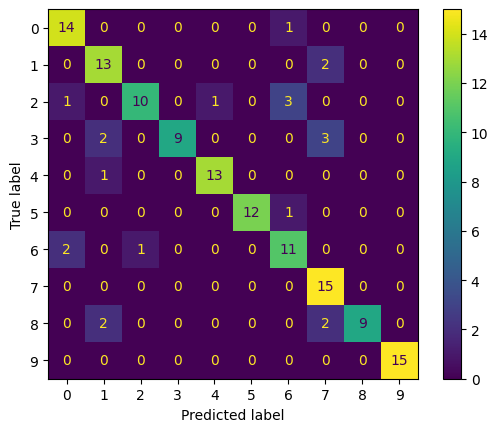

In [74]:
cm=confusion_matrix(cv_test,y_pred1)
x=ConfusionMatrixDisplay(cm)
x.plot()
plt.show()